# Labeling: Excess Return Over Mean

![image_example](img/distribution_over_mean.png)
_*Fig. 1:*_ Distribution of excess over mean return for 20 stock tickers from period between Jan 2019 and May 2020.

## Abstract

Using cross-sectional data on returns of many different stocks, each observation is labeled according to whether (or how much)
its return exceeds the mean return. It is a common practice to label observations based on whether the return is positive or negative. However, this may produce unbalanced classes, as during market booms the probability of a positive return is much higher, and during market crashes they are lower (Coqueret and Guida, 2020). Labeling according to a benchmark such as mean return
alleviates this issue.


## How it works

A dataframe containing forward total stock returns is calculated from close prices. The mean return of all companies at time $t$ in the dataframe is used to represent the market return, and excess returns are calculated by subtracting the mean return from each stock's return over the time period $t$. The numerical returns can then be used as-is (for regression analysis), or can be relabeled to represent their sign (for classification analysis).

At time $t$:
$$P_t = \{p_{t,0}, p_{t,1}, ..., p_{t,n}\}$$
$$R_t = \{r_{t,0}, r_{t,1}, ..., r_{t,n}\}$$
$$\mu_t = mean(R_t)$$
$$L(R_t) = \{r_{t,0} - \mu_t, r_{t,1} - \mu_t, ...,r_{t,n} - \mu_t\}$$

If categorical rather than numerical labels are desired:

$$
     \begin{equation}
     \begin{split}
       L(p_{t,n}) = \begin{cases}
       -1 &\ \text{if} \ \ r_{t,n} - \mu_t < 0\\
       0 &\ \text{if} \ \ r_{t,n} - \mu_t = 0\\
       1 &\ \text{if} \ \ r_{t,n} - \mu_t > 0\\
       \end{cases}
     \end{split}
     \end{equation}
$$

---
## Examples of use

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

from mlfinlab.labeling import excess_over_mean

import matplotlib.pyplot as plt

In [2]:
# Load price data for 20 stocks
tickers = "AAPL GOOG MSFT COST PFE SYY F GE BABA AMD CCL ZM FB WFC JPM AAL UBER C UA VZ"

data = yf.download(tickers, start="2019-01-20", end="2020-05-25",
                   group_by="ticker")
data = data.loc[:, (slice(None), 'Adj Close')]
data.columns = data.columns.droplevel(1)
data.head()

[*********************100%***********************]  20 of 20 completed


,AMD,UBER,ZM,VZ,PFE,C,AAPL,FB,JPM,COST,GE,SYY,GOOG,UA,BABA,AAL,CCL,MSFT,WFC,F
Date,,,,,,,,,,,,,,,,,,,,
2019-01-22,19.760000,NaN,NaN,54.096535,39.946537,59.116608,150.266403,147.570007,98.963676,209.413116,8.285392,60.661575,1070.520020,18.590000,152.149994,32.219025,51.750248,103.568062,46.484818,7.837517
2019-01-23,19.799999,NaN,NaN,54.827435,39.842587,59.384232,150.874130,144.300003,98.713730,209.107468,8.352365,60.884239,1075.569946,18.400000,152.029999,31.146364,51.512947,104.577469,46.727222,7.689988
2019-01-24,20.850000,NaN,NaN,54.172474,38.699097,59.938599,149.678253,145.830002,98.771400,207.352509,8.400200,60.535717,1073.900024,18.860001,155.860001,33.124386,52.224846,104.077667,46.596699,7.929724
2019-01-25,21.930000,NaN,NaN,53.536488,38.406132,61.190701,154.638153,149.009995,99.396294,206.129929,8.763762,60.041988,1090.989990,19.490000,159.210007,34.423378,52.689953,105.028282,46.736546,8.169458
2019-01-28,20.180000,NaN,NaN,52.274014,37.357147,61.028221,153.207047,147.470001,99.867378,207.806046,8.543714,60.284012,1070.079956,19.370001,158.919998,35.988075,53.534740,102.980049,46.447533,7.985046


We can find excess over mean over the given time period and plot the distribution.

In [3]:
excess1 = excess_over_mean(data, lag=True)
excess1.head()

,AMD,UBER,ZM,VZ,PFE,C,AAPL,FB,JPM,COST,GE,SYY,GOOG,UA,BABA,AAL,CCL,MSFT,WFC,F
Date,,,,,,,,,,,,,,,,,,,,
2019-01-22,0.004297,NaN,NaN,0.015784,-0.000329,0.006800,0.006318,-0.019886,-0.000252,0.000814,0.010356,0.005944,0.006991,-0.007947,0.001485,-0.031020,-0.002312,0.012020,0.007488,-0.016550
2019-01-23,0.043799,NaN,NaN,-0.021177,-0.037931,0.000104,-0.017157,0.001372,-0.008647,-0.017624,-0.003504,-0.014955,-0.010784,0.015769,0.015961,0.054276,0.004589,-0.014010,-0.012024,0.021944
2019-01-24,0.034844,NaN,NaN,-0.028694,-0.024525,0.003936,0.016183,0.004852,-0.010628,-0.022850,0.026326,-0.025110,-0.001040,0.016450,0.004539,0.022261,-0.008048,-0.007821,-0.013953,0.013278
2019-01-25,-0.070074,NaN,NaN,-0.013856,-0.017587,0.007070,0.000471,-0.000609,0.014465,0.017857,-0.015383,0.013757,-0.009440,0.003569,0.007904,0.055180,0.025759,-0.009776,0.003542,-0.012848
2019-01-28,-0.037258,NaN,NaN,-0.023677,0.040195,-0.001197,-0.001538,-0.013415,0.011618,0.006644,0.005467,0.005294,-0.000014,-0.013889,-0.004010,0.001170,0.006344,-0.011539,0.009429,0.020374


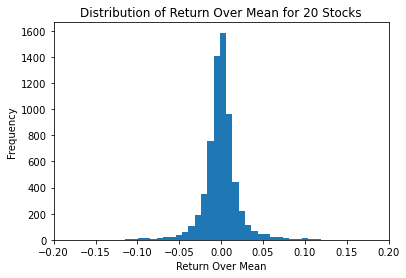

In [4]:
s1 = pd.Series(excess1.iloc[:-1, :].values.flatten())
ax1 = s1.plot.hist(bins=80)
ax1.set_xlim(-0.2,0.2)
ax1.set_xlabel('Return Over Mean')
ax1.set_title('Distribution of Return Over Mean for 20 Stocks'); 

We can return the sign of the excess over mean rather than the numerical value.

In [5]:
excess2 = excess_over_mean(data, binary=True)
excess2.stack().value_counts()

-1.0    3347
 1.0    3256
dtype: int64

## With resampling

We can also resample data prior to labeling.

In [6]:
# Resample by week.
excess3 = excess_over_mean(data, resample_by='W', lag=True)
excess3.head()

,AMD,UBER,ZM,VZ,PFE,C,AAPL,FB,JPM,COST,GE,SYY,GOOG,UA,BABA,AAL,CCL,MSFT,WFC,F
Date,,,,,,,,,,,,,,,,,,,,
2019-01-27,0.088544,NaN,NaN,-0.061905,0.035230,-0.027578,0.026424,0.082970,-0.024364,-0.023363,0.083342,-0.004111,-0.010991,-0.061427,0.025918,0.003201,0.010529,-0.070066,-0.044595,-0.027758
2019-02-03,-0.050317,NaN,NaN,-0.001748,-0.005908,-0.016821,0.037000,0.019027,-0.015008,-0.000065,-0.028041,0.050622,-0.004875,0.018795,0.005619,0.008922,-0.009464,0.037369,-0.016511,-0.028594
2019-02-10,0.012733,NaN,NaN,0.007829,-0.010573,0.021847,-0.014540,-0.043464,0.026739,0.027374,0.013943,0.005643,0.002377,-0.014599,-0.021829,-0.040988,-0.003651,0.009532,0.018349,0.003279
2019-02-17,0.013680,NaN,NaN,0.016871,-0.001829,-0.017059,-0.000073,-0.018790,-0.020247,-0.015868,-0.007107,-0.018145,-0.017981,0.017527,0.049785,-0.002482,0.021192,0.014754,-0.019099,0.004870
2019-02-24,-0.037503,NaN,NaN,-0.008886,-0.000277,-0.004443,0.001974,-0.007179,-0.015017,0.004975,0.040638,-0.005875,0.017988,0.028560,0.029752,-0.033539,-0.026249,0.004470,0.011015,-0.000403


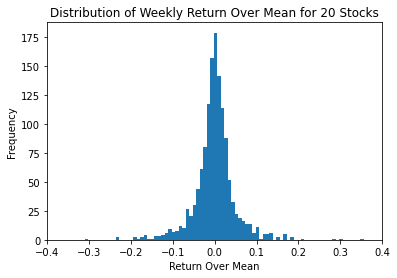

In [7]:
s3 = pd.Series(excess3.iloc[:-1, :].values.flatten())
ax3 = s3.plot.hist(bins=80)
ax3.set_xlim(-0.4,0.4)
ax3.set_xlabel('Return Over Mean')
ax3.set_title('Distribution of Weekly Return Over Mean for 20 Stocks');

In [8]:
excess4 = excess_over_mean(data, binary=True,resample_by='W', lag=True)
excess4.stack().value_counts()

 1.0    684
-1.0    669
dtype: int64

---
## Conclusion

This notebook presents the method to label data according to excess return over mean. This method can return either numerical or categorical labels for observations. In this process:
 - Forward rates of return for assets are calculated for the entire selection of stocks indexed by time bars.
 - At each time index, the mean rate of return for all stocks is calculated. The mean is subtracted from each stock's return to find the excess return over mean.
 - If categorical labels are desired, the excess returns are converted to their signs.

This method is useful in preventing unbalanced classes, which is likely to happen when labeling simply based on the sign of the return.

## References

Coqueret, G. and Guida, T., 2020. Machine Learning For Factor Investing.